# Breast Cancer Research by Malay Rajpoot
### Frontend of the project

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
# Building our model to load our weights

image_size = 256
batch_size = 10
channel = 3
epochs = 5

class_names_CD = ['Cancer', 'Normal']
class_names_TC = ['Dense_Glandular', 'Fatty', 'Fatty_Glandular']
class_names_CT = ['Architectural distortion', 'Asymmetry', 'Calcification', 'Circuscribed Mass', 'Ill defined Mass', 'Spiculated Mass']
class_names_CS = ['Beningn','Malignant']

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(image_size, image_size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

input_shape = (batch_size, image_size, image_size, 3)
n_classes = 2

model_CD = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(n_classes, activation='softmax'),
])

model_CD.build(input_shape = input_shape)

input_shape = (batch_size, image_size, image_size, 3)
n_classes = 3

model_TC = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(n_classes, activation='softmax'),
])

model_TC.build(input_shape = input_shape)

input_shape = (batch_size, image_size, image_size, 3)
n_classes = 6

model_CT = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(n_classes, activation='softmax'),
])

model_CT.build(input_shape = input_shape)

input_shape = (batch_size, image_size, image_size, 3) # 3 is the number of channels
n_classes = 2

model_CS = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(n_classes, activation='softmax'),
])

model_CS.build(input_shape = input_shape)

model_CD.load_weights('Cancer_Detection')
model_TC.load_weights('Cancer_TissueClassifier')
model_CT.load_weights('Cancer_TypeClassifier')
model_CS.load_weights('Cancer_Severity_2')

In [4]:
def predict_CD(img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_CD.predict(img_array)

    predicted_class = class_names_CD[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def predict_TC(img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_TC.predict(img_array)

    predicted_class = class_names_TC[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def predict_CT(img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_CT.predict(img_array)

    predicted_class = class_names_CT[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def predict_CS(img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_CS.predict(img_array)

    predicted_class = class_names_CS[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def seperation_tc(a):
    if a == 0:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty'
    if a == 1:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty_Glandular'
    if a == 2:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Dense_Glandular'
    
def seperation_cd(a):
    if a == 0:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Normal'
    if a == 1:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect\Cancer'

def seperation_ct(a):
    if a == 0:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Normal'
    if a == 1:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Circuscribed Mass'
    if a == 2:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Calcification'
    if a == 3:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Spiculated Mass'
    if a == 4:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Architectural distortion'
    if a == 5:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Ill defined Mass'
    if a == 6:return r'C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Type\Asymmetry'

def seperation_cs(a):
    if a == 0:return r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant"
    if a == 1:return r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Beningn"

Image Received
1/1 [==============================] - 0s 32ms/step
Cancer

Type of Tissue found: Dense_Glandular
The Confidence is: 98.36

Abnormal Mass Detected with Confidence of 98.58%

Type of Mass Found : Asymmetry
The Confidence of prediction is: 69.04%

The Mass is : Malignant
The Confidence of prediction is: 96.21%

Consult a doctor immediately!!


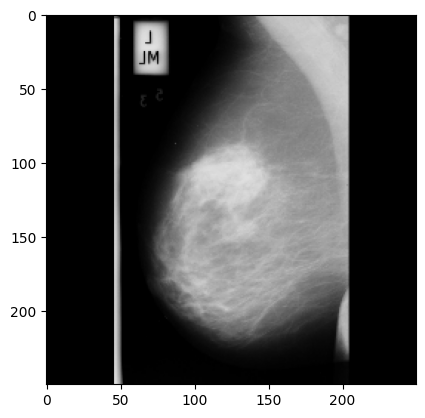

In [6]:
import numpy as np   

import cv2
src = r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Severity\Malignant\mdb111.png"
image = cv2.imread(src)
dimensions = (250, 250)
image = cv2.resize(image, dimensions)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

first_image = image.astype('uint8')
first_label = 1
print("Image Received")
plt.imshow(first_image)


pred_class_CD, pred_conf_CD = predict_CD(first_image)
pred_class_TC, pred_conf_TC = predict_TC(first_image)
pred_class_CT, pred_conf_CT = predict_CT(first_image)
pred_class_CS, pred_conf_CS = predict_CS(first_image)

print(pred_class_CD)

print("\nType of Tissue found: "+pred_class_TC+"\nThe Confidence is: "+str(pred_conf_TC))

if(pred_class_CD=="Cancer"):
    print("\nAbnormal Mass Detected with Confidence of "+str(pred_conf_CD)+"%")
    print("\nType of Mass Found : "+pred_class_CT+"\nThe Confidence of prediction is: "+str(pred_conf_CT)+"%")
    print("\nThe Mass is : "+pred_class_CS+"\nThe Confidence of prediction is: "+str(pred_conf_CS)+"%")
    if(pred_class_CS=="Malignant"):
        print("\nConsult a doctor immediately!!")
    else:
        print("\nYou should visit a Doctor for a checkup")

else: print("\nNo abnormal Mass Detected, Confidence "+str(pred_conf_CD)+"%")



In [ ]:
import os
import shutil

src = " "

n = input("Press 1 or 0 if the given results were correct:")
if n=='1': 
    n = input("Thank you for using this model. Would you like to load this image in our database for training purpose ?: ")
    if n=='1':
        CD = class_names_CD.index(pred_class_CD)
        TC = class_names_TC.index(pred_class_TC)
        CT = class_names_CT.index(pred_class_CT)
        CS = class_names_CS.index(pred_class_CS)
        if(CD == 1):
            shutil.copy2(src,seperation_cd(CD))
            shutil.copy2(src,seperation_tc(TC))
            print("Added Images to CD and TC database")
        else:
            shutil.copy2(src,seperation_cd(CD))
            shutil.copy2(src,seperation_cs(CS))
            shutil.copy2(src,seperation_tc(TC))
            shutil.copy2(src,seperation_ct(CT))
            print("Added Images to all databases ")
    else:
        print("No Problem, Thank you")
else:
    n = input("Sorry, Would you like to load this image in our database for training purpose ?: ")
    if n=='1':
        print("Please enter the correct details about the image")
        CD = input("Cancer Detection:")
        TC = input("Tissue Classification:")
        if(CD == 1):
            shutil.copy2(src,seperation_cd(CD))
            shutil.copy2(src,seperation_tc(TC))
            print("Added Images to CD and TC database")
        else:
            CT = input("Mass Type:")
            CS = input("Beningn or Malignant:")
            shutil.copy2(src,seperation_cd(CD))
            shutil.copy2(src,seperation_cs(CS))
            shutil.copy2(src,seperation_tc(TC))
            shutil.copy2(src,seperation_ct(CT))
            print("Added Images to all databases, We will train the model again for better results")
    else:
        print("No Problem, Thank you")
        
